## Домашнее задание <a class='anchor' id='hw'>

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [1]:
import keras
keras.__version__

'2.7.0'

In [2]:
keras.backend.backend()

'tensorflow'

In [3]:
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
import numpy as np

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 4


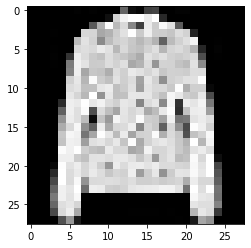

In [4]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [5]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [6]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# Задание 1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 

In [25]:
#сделаем one-hot encoding для подачи таргета на обучение
from keras.utils.np_utils import to_categorical


y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Попробуем 20 нейронов в скрытом слое

In [8]:
from keras.layers import Dense
from keras.models import Sequential


model = Sequential([
    Dense(20, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/5
60/60 [==============================] - 1s 14ms/step - loss: 2.1191 - accuracy: 0.2139 - val_loss: 1.9425 - val_accuracy: 0.3333
Epoch 2/5
60/60 [==============================] - 1s 11ms/step - loss: 1.7934 - accuracy: 0.3967 - val_loss: 1.6547 - val_accuracy: 0.4541
Epoch 3/5
60/60 [==============================] - 1s 11ms/step - loss: 1.4787 - accuracy: 0.5512 - val_loss: 1.3493 - val_accuracy: 0.6071
Epoch 4/5
60/60 [==============================] - 1s 10ms/step - loss: 1.2478 - accuracy: 0.6417 - val_loss: 1.1761 - val_accuracy: 0.6536
Epoch 5/5
60/60 [==============================] - 1s 10ms/step - loss: 1.1046 - accuracy: 0.6696 - val_loss: 1.0628 - val_accuracy: 0.6662


Попробуем 40 нейронов в скрытом слое

In [13]:
model = Sequential([
    Dense(40, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 40)                31400     
                                                                 
 dense_3 (Dense)             (None, 10)                410       
                                                                 
Total params: 31,810
Trainable params: 31,810
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/5
60/60 [==============================] - 1s 12ms/step - loss: 2.0229 - accuracy: 0.3095 - val_loss: 1.7161 - val_accuracy: 0.4765
Epoch 2/5
60/60 [==============================] - 1s 10ms/step - loss: 1.5086 - accuracy: 0.5639 - val_loss: 1.3416 - val_accuracy: 0.6260
Epoch 3/5
60/60 [==============================] - 1s 10ms/step - loss: 1.2254 - accuracy: 0.6468 - val_loss: 1.1384 - val_accuracy: 0.6613
Epoch 4/5
60/60 [==============================] - 1s 11ms/step - loss: 1.0659 - accuracy: 0.6787 - val_loss: 1.0194 - val_accuracy: 0.6847
Epoch 5/5
60/60 [==============================] - 1s 11ms/step - loss: 0.9676 - accuracy: 0.7005 - val_loss: 0.9418 - val_accuracy: 0.7024


Попробуем 64 нейрона в скрытом слое

In [16]:
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/5
60/60 [==============================] - 1s 12ms/step - loss: 1.8966 - accuracy: 0.4380 - val_loss: 1.6018 - val_accuracy: 0.5703
Epoch 2/5
60/60 [==============================] - 1s 10ms/step - loss: 1.4079 - accuracy: 0.6187 - val_loss: 1.2670 - val_accuracy: 0.6317
Epoch 3/5
60/60 [==============================] - 1s 10ms/step - loss: 1.1603 - accuracy: 0.6558 - val_loss: 1.0920 - val_accuracy: 0.6554
Epoch 4/5
60/60 [==============================] - 1s 13ms/step - loss: 1.0235 - accuracy: 0.6760 - val_loss: 0.9884 - val_accuracy: 0.6751
Epoch 5/5
60/60 [==============================] - 1s 11ms/step - loss: 0.9375 - accuracy: 0.6943 - val_loss: 0.9192 - val_accuracy: 0.6923


Попробуем 128 нейронов в скрытом слое

In [19]:
model = Sequential([
    Dense(128, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/5
60/60 [==============================] - 1s 17ms/step - loss: 1.8577 - accuracy: 0.4268 - val_loss: 1.5174 - val_accuracy: 0.6049
Epoch 2/5
60/60 [==============================] - 1s 17ms/step - loss: 1.3371 - accuracy: 0.6400 - val_loss: 1.2038 - val_accuracy: 0.6507
Epoch 3/5
60/60 [==============================] - 1s 15ms/step - loss: 1.1090 - accuracy: 0.6693 - val_loss: 1.0452 - val_accuracy: 0.6695
Epoch 4/5
60/60 [==============================] - 1s 15ms/step - loss: 0.9842 - accuracy: 0.6893 - val_loss: 0.9515 - val_accuracy: 0.6885
Epoch 5/5
60/60 [==============================] - 1s 17ms/step - loss: 0.9059 - accuracy: 0.7061 - val_loss: 0.8887 - val_accuracy: 0.7029


Попробуем 256 нейронов в скрытом слое

In [22]:
model = Sequential([
    Dense(256, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/5
60/60 [==============================] - 2s 27ms/step - loss: 1.8121 - accuracy: 0.4544 - val_loss: 1.4641 - val_accuracy: 0.6159
Epoch 2/5
60/60 [==============================] - 2s 26ms/step - loss: 1.2806 - accuracy: 0.6568 - val_loss: 1.1521 - val_accuracy: 0.6711
Epoch 3/5
60/60 [==============================] - 2s 26ms/step - loss: 1.0579 - accuracy: 0.6889 - val_loss: 0.9994 - val_accuracy: 0.6902
Epoch 4/5
60/60 [==============================] - 2s 26ms/step - loss: 0.9382 - accuracy: 0.7118 - val_loss: 0.9089 - val_accuracy: 0.7141
Epoch 5/5
60/60 [==============================] - 1s 23ms/step - loss: 0.8628 - accuracy: 0.7304 - val_loss: 0.8486 - val_accuracy: 0.7306


# Вывод:
Судя по проведенным экспериментам в двухслойной сети, увеличение числа нейронов на скрытом слое в целом улучшает качество модели. 

# Опишите - какой результат нейросети получен в зависимости от:

  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).

## 2 слоя, 31810 обучаемых параметров

In [30]:
model = Sequential([
    Dense(40, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 40)                31400     
                                                                 
 dense_15 (Dense)            (None, 10)                410       
                                                                 
Total params: 31,810
Trainable params: 31,810
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/5
60/60 [==============================] - 1s 14ms/step - loss: 1.0779 - accuracy: 0.6415 - val_loss: 0.6945 - val_accuracy: 0.7638
Epoch 2/5
60/60 [==============================] - 1s 9ms/step - loss: 0.6048 - accuracy: 0.7981 - val_loss: 0.5698 - val_accuracy: 0.8086
Epoch 3/5
60/60 [==============================] - 1s 9ms/step - loss: 0.5208 - accuracy: 0.8259 - val_loss: 0.5221 - val_accuracy: 0.8216
Epoch 4/5
60/60 [==============================] - 1s 9ms/step - loss: 0.4798 - accuracy: 0.8364 - val_loss: 0.4926 - val_accuracy: 0.8291
Epoch 5/5
60/60 [==============================] - 1s 9ms/step - loss: 0.4532 - accuracy: 0.8456 - val_loss: 0.4692 - val_accuracy: 0.8377


## 3 слоя, 31408 обучаемых параметров

In [33]:
model = Sequential([
    Dense(38, input_shape=(28 * 28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 38)                29830     
                                                                 
 dense_17 (Dense)            (None, 32)                1248      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 31,408
Trainable params: 31,408
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/5
60/60 [==============================] - 2s 22ms/step - loss: 1.2389 - accuracy: 0.5900 - val_loss: 0.7240 - val_accuracy: 0.7515
Epoch 2/5
60/60 [==============================] - 1s 16ms/step - loss: 0.5992 - accuracy: 0.8016 - val_loss: 0.5515 - val_accuracy: 0.8132
Epoch 3/5
60/60 [==============================] - 1s 12ms/step - loss: 0.4992 - accuracy: 0.8295 - val_loss: 0.5002 - val_accuracy: 0.8257
Epoch 4/5
60/60 [==============================] - 1s 12ms/step - loss: 0.4567 - accuracy: 0.8427 - val_loss: 0.4718 - val_accuracy: 0.8381
Epoch 5/5
60/60 [==============================] - 1s 11ms/step - loss: 0.4316 - accuracy: 0.8519 - val_loss: 0.4548 - val_accuracy: 0.8427


## 5 слоёв, 31355 обучаемых параметров

In [39]:
model = Sequential([
    Dense(35, input_shape=(28 * 28,), activation='relu'),
    Dense(30, activation='relu'),
    Dense(20, activation='relu'),
    Dense(70, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 35)                27475     
                                                                 
 dense_25 (Dense)            (None, 30)                1080      
                                                                 
 dense_26 (Dense)            (None, 20)                620       
                                                                 
 dense_27 (Dense)            (None, 70)                1470      
                                                                 
 dense_28 (Dense)            (None, 10)                710       
                                                                 
Total params: 31,355
Trainable params: 31,355
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/5
60/60 [==============================] - 2s 16ms/step - loss: 1.2864 - accuracy: 0.5219 - val_loss: 0.7454 - val_accuracy: 0.7089
Epoch 2/5
60/60 [==============================] - 1s 11ms/step - loss: 0.6199 - accuracy: 0.7809 - val_loss: 0.5651 - val_accuracy: 0.8007
Epoch 3/5
60/60 [==============================] - 1s 12ms/step - loss: 0.5067 - accuracy: 0.8235 - val_loss: 0.5111 - val_accuracy: 0.8245
Epoch 4/5
60/60 [==============================] - 1s 13ms/step - loss: 0.4541 - accuracy: 0.8420 - val_loss: 0.4800 - val_accuracy: 0.8277
Epoch 5/5
60/60 [==============================] - 1s 13ms/step - loss: 0.4254 - accuracy: 0.8510 - val_loss: 0.4572 - val_accuracy: 0.8363


## 10 слоёв, 31457 обучаемых параметров

In [42]:
model = Sequential([
    Dense(35, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(32, activation='relu'),
    Dense(20, activation='relu'),
    Dense(25, activation='relu'),
    Dense(20, activation='relu'),  
    Dense(20, activation='relu'),
    Dense(40, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 35)                27475     
                                                                 
 dense_30 (Dense)            (None, 10)                360       
                                                                 
 dense_31 (Dense)            (None, 5)                 55        
                                                                 
 dense_32 (Dense)            (None, 32)                192       
                                                                 
 dense_33 (Dense)            (None, 20)                660       
                                                                 
 dense_34 (Dense)            (None, 25)                525       
                                                                 
 dense_35 (Dense)            (None, 20)              

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [45]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/5
60/60 [==============================] - 2s 19ms/step - loss: 1.9986 - accuracy: 0.2270 - val_loss: 1.6576 - val_accuracy: 0.3817
Epoch 2/5
60/60 [==============================] - 1s 16ms/step - loss: 1.2454 - accuracy: 0.5441 - val_loss: 0.8681 - val_accuracy: 0.6794
Epoch 3/5
60/60 [==============================] - 1s 14ms/step - loss: 0.6906 - accuracy: 0.7414 - val_loss: 0.6355 - val_accuracy: 0.7613
Epoch 4/5
60/60 [==============================] - 1s 15ms/step - loss: 0.5632 - accuracy: 0.7891 - val_loss: 0.5699 - val_accuracy: 0.7855
Epoch 5/5
60/60 [==============================] - 1s 14ms/step - loss: 0.5237 - accuracy: 0.8039 - val_loss: 0.5326 - val_accuracy: 0.8036


#Вывод: 

увеличение числа слоев (при ~ одинаковом числе обучаемых весов) в целом ухудшает качество модели.

# Задание 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

## SGD

In [48]:
model = Sequential([
    Dense(512, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 512)               401920    
                                                                 
 dense_44 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/10
60/60 [==============================] - 3s 44ms/step - loss: 1.7610 - accuracy: 0.4793 - val_loss: 1.3954 - val_accuracy: 0.6323
Epoch 2/10
60/60 [==============================] - 3s 44ms/step - loss: 1.2180 - accuracy: 0.6632 - val_loss: 1.0979 - val_accuracy: 0.6711
Epoch 3/10
60/60 [==============================] - 2s 40ms/step - loss: 1.0114 - accuracy: 0.6938 - val_loss: 0.9603 - val_accuracy: 0.6990
Epoch 4/10
60/60 [==============================] - 2s 40ms/step - loss: 0.9044 - accuracy: 0.7193 - val_loss: 0.8800 - val_accuracy: 0.7181
Epoch 5/10
60/60 [==============================] - 2s 41ms/step - loss: 0.8369 - accuracy: 0.7376 - val_loss: 0.8256 - val_accuracy: 0.7345
Epoch 6/10
60/60 [==============================] - 2s 41ms/step - loss: 0.7895 - accuracy: 0.7530 - val_loss: 0.7857 - val_accuracy: 0.7464
Epoch 7/10
60/60 [==============================] - 2s 42ms/step - loss: 0.7536 - accuracy: 0.7642 - val_loss: 0.7547 - val_accuracy: 0.7557
Epoch 8/10
60

## RMSProp

In [52]:
model = Sequential([
    Dense(512, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 512)               401920    
                                                                 
 dense_46 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

In [54]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/10
60/60 [==============================] - 3s 47ms/step - loss: 0.8545 - accuracy: 0.7111 - val_loss: 0.6058 - val_accuracy: 0.7934
Epoch 2/10
60/60 [==============================] - 3s 44ms/step - loss: 0.5565 - accuracy: 0.8029 - val_loss: 0.4857 - val_accuracy: 0.8281
Epoch 3/10
60/60 [==============================] - 3s 43ms/step - loss: 0.4784 - accuracy: 0.8264 - val_loss: 0.4875 - val_accuracy: 0.8146
Epoch 4/10
60/60 [==============================] - 3s 42ms/step - loss: 0.4287 - accuracy: 0.8429 - val_loss: 0.4524 - val_accuracy: 0.8317
Epoch 5/10
60/60 [==============================] - 3s 44ms/step - loss: 0.3977 - accuracy: 0.8523 - val_loss: 0.4195 - val_accuracy: 0.8459
Epoch 6/10
60/60 [==============================] - 3s 43ms/step - loss: 0.3681 - accuracy: 0.8656 - val_loss: 0.4272 - val_accuracy: 0.8355
Epoch 7/10
60/60 [==============================] - 3s 46ms/step - loss: 0.3539 - accuracy: 0.8707 - val_loss: 0.4138 - val_accuracy: 0.8465
Epoch 8/10
60

## Adam

In [55]:
model = Sequential([
    Dense(512, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 512)               401920    
                                                                 
 dense_48 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=1000, 
                    verbose=1,
                    validation_data=(X_test, y_test)
                    ) 

Epoch 1/10
60/60 [==============================] - 3s 46ms/step - loss: 0.6785 - accuracy: 0.7736 - val_loss: 0.5109 - val_accuracy: 0.8239
Epoch 2/10
60/60 [==============================] - 2s 41ms/step - loss: 0.4443 - accuracy: 0.8483 - val_loss: 0.4480 - val_accuracy: 0.8435
Epoch 3/10
60/60 [==============================] - 2s 40ms/step - loss: 0.4008 - accuracy: 0.8610 - val_loss: 0.4270 - val_accuracy: 0.8502
Epoch 4/10
60/60 [==============================] - 2s 41ms/step - loss: 0.3763 - accuracy: 0.8684 - val_loss: 0.4111 - val_accuracy: 0.8564
Epoch 5/10
60/60 [==============================] - 2s 39ms/step - loss: 0.3508 - accuracy: 0.8774 - val_loss: 0.3872 - val_accuracy: 0.8619
Epoch 6/10
60/60 [==============================] - 2s 41ms/step - loss: 0.3364 - accuracy: 0.8796 - val_loss: 0.3830 - val_accuracy: 0.8651
Epoch 7/10
60/60 [==============================] - 2s 39ms/step - loss: 0.3190 - accuracy: 0.8874 - val_loss: 0.3604 - val_accuracy: 0.8722
Epoch 8/10
60

# Задание 3. Вывод:

Adam и RMSProp справились гораздо лучше SGD. В данной задаче Adam и RMSProp справились примерно одинаково.

# Задание 4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
predictions = model.predict(X_test)

pred_labels = np.argmax(predictions, axis=1)
pred_labels

array([9, 2, 1, ..., 8, 1, 5])

In [61]:
cm = confusion_matrix(y_test_labels, pred_labels)
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [64]:
import pandas as pd

cm_df = pd.DataFrame(cm,
                     index = class_names, 
                     columns = class_names)

In [65]:
cm_df

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,906,1,5,14,6,0,60,1,7,0
Trouser,5,970,0,19,4,0,1,0,1,0
Pullover,22,1,709,15,144,0,107,0,2,0
Dress,44,17,8,875,33,0,19,0,4,0
Coat,1,1,59,30,850,0,57,0,2,0
Sandal,0,0,0,1,0,959,0,25,2,13
Shirt,191,4,59,24,94,0,616,0,12,0
Sneaker,0,0,0,0,0,22,0,942,0,36
Bag,7,1,1,5,4,3,6,4,969,0
Ankle boot,0,0,0,0,0,6,1,29,0,964


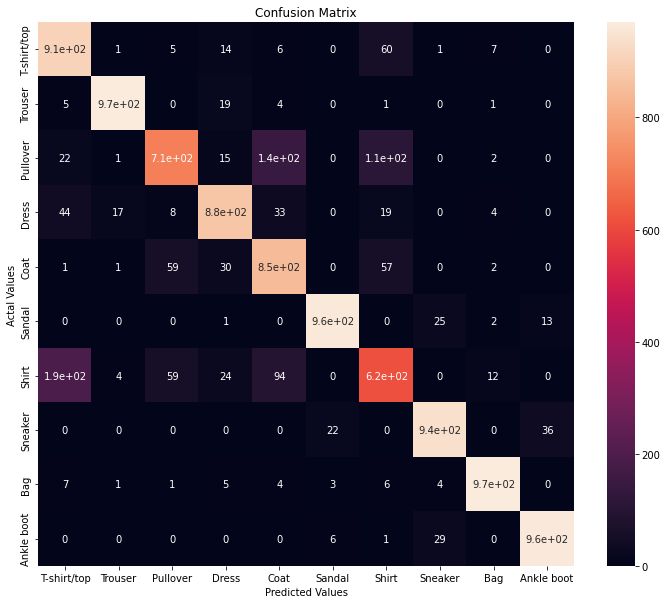

In [67]:
import seaborn as sns

#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [72]:
from sklearn.metrics import precision_score, recall_score

print(f'общий precision = {precision_score(y_test_labels, pred_labels, average="macro")}')
print(f'общий recall = {recall_score(y_test_labels, pred_labels, average="macro")}')

общий precision = 0.8769198025080561
общий recall = 0.876


In [73]:
series_1 = pd.Series(y_test_labels, name='y_test_labels')
series_2 = pd.Series(pred_labels, name='pred_labels')

df = series_1.to_frame()
df['pred_labels'] = series_2

df.head()

,y_test_labels,pred_labels
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [223]:
# Precision
precision = df['pred_labels'][(df['pred_labels'] == 0) & (df['y_test_labels'] == 0)].count() / df['pred_labels'][(df['pred_labels'] == 0)].count()
# Recall
recall = df['y_test_labels'][(df['y_test_labels'] == 0) & (df ['pred_labels'] == 0)].count() / df['y_test_labels'][(df['y_test_labels'] == 0)].count()

precision, recall

(0.9817997977755308, 0.9908163265306122)

In [76]:
class_names = {0:'T-shirt/top',
               1:'Trouser',
               2:'Pullover',
               3:'Dress',
               4:'Coat',
               5:'Sandal',
               6:'Shirt',
               7:'Sneaker',
               8:'Bag',
               9:'Ankle boot'}

In [77]:
for i in set(y_test_labels):
    # Precision
    precision = df['pred_labels'][(df['pred_labels'] == i) & (df['y_test_labels'] == i)].count() / df['pred_labels'][(df['pred_labels'] == i)].count()
    # Recall
    recall = df['y_test_labels'][(df['y_test_labels'] == i) & (df ['pred_labels'] == i)].count() / df['y_test_labels'][(df['y_test_labels'] == i)].count()

    print(f'precision for class {class_names[i]} = {precision}')
    print(f'recall for class {class_names[i]} = {recall}')
    print('-----------------------------------')

precision for class T-shirt/top = 0.7704081632653061
recall for class T-shirt/top = 0.906
-----------------------------------
precision for class Trouser = 0.9748743718592965
recall for class Trouser = 0.97
-----------------------------------
precision for class Pullover = 0.8430439952437574
recall for class Pullover = 0.709
-----------------------------------
precision for class Dress = 0.8901322482197355
recall for class Dress = 0.875
-----------------------------------
precision for class Coat = 0.748898678414097
recall for class Coat = 0.85
-----------------------------------
precision for class Sandal = 0.9686868686868687
recall for class Sandal = 0.959
-----------------------------------
precision for class Shirt = 0.7104959630911188
recall for class Shirt = 0.616
-----------------------------------
precision for class Sneaker = 0.9410589410589411
recall for class Sneaker = 0.942
-----------------------------------
precision for class Bag = 0.96996996996997
recall for class Bag =